<a href="https://colab.research.google.com/github/Tverdokhliebov-Vladyslav/123/blob/main/lab10_%D0%A2%D0%B2%D0%B5%D1%80%D0%B4%D0%BE%D1%85%D0%BB%D1%94%D0%B1%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
26421880/26421880 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 0us/step
5148/5148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
4422102/4422102 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 0us/step


In [3]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [4]:
# –ú–∞—Å—à—Ç–∞–±—É–≤–∞–Ω–Ω—è –ø—ñ–∫—Å–µ–ª—ñ–≤ –¥–æ –¥—ñ–∞–ø–∞–∑–æ–Ω—É [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# –ü–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è –º—ñ—Ç–æ–∫ –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω—ñ –¥–∞–Ω—ñ
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

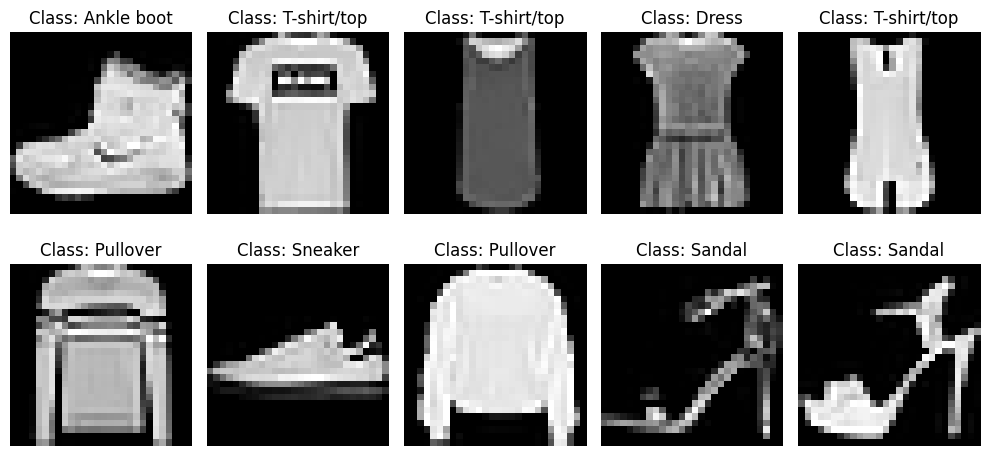

In [6]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Class: {class_names[y_train[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è –º–æ–¥–µ–ª—ñ
model = Sequential([
    Input(shape=(28, 28, 1)),

    Conv2D(32, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
    ])

# –ö–æ–º–ø—ñ–ª—è—Ü—ñ—è –º–æ–¥–µ–ª—ñ
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# –ù–∞–≤—á–∞–Ω–Ω—è –º–æ–¥–µ–ª—ñ
history = model.fit(
    x_train, y_train_cat,
    batch_size=128,
    epochs=100,
    validation_data=(x_test, y_test_cat),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 20ms/step - accuracy: 0.7540 - loss: 0.7090 - val_accuracy: 0.6739 - val_loss: 0.9976 - learning_rate: 0.0010
Epoch 2/100
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 6ms/step - accuracy: 0.8661 - loss: 0.3578 - val_accuracy: 0.8902 - val_loss: 0.3062 - learning_rate: 0.0010
Epoch 3/100
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 6ms/step - accuracy: 0.8874 - loss: 0.3041 - val_accuracy: 0.8948 - val_loss: 0.3018 - learning_rate: 0.0010
Epoch 4/100
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 6ms/step - accuracy: 0.8989 - loss: 0.2747 - val_accuracy: 0.9029 - val_loss: 0.2599 - learning_rate: 0.0010
Epoch 5/100
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.9075 - loss: 0.2533 - val_accuracy: 0.8990 - val_loss: 0.2695 - learning_rate: 0.0010
Epoch 6/100
469/469 ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [9]:
# –û—Ü—ñ–Ω–∫–∞ –º–æ–¥–µ–ª—ñ
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

# –ó–±–µ—Ä–µ–∂–µ–Ω–Ω—è –≤–∞–≥—ñ–≤ –º–æ–¥–µ–ª—ñ –ø—ñ—Å–ª—è —Ç—Ä–µ–Ω—É–≤–∞–Ω–Ω—è
model.save('fashion_mnist_model.keras')

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9305 - loss: 0.2047
Test accuracy: 0.9341999888420105
Test loss: 0.19529178738594055


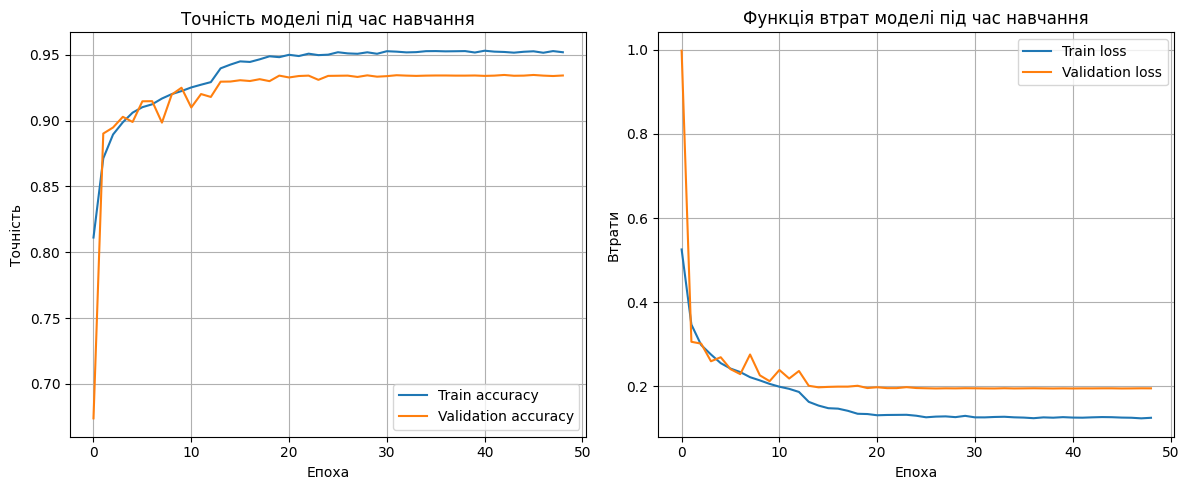

In [10]:
# –ü–æ–±—É–¥–æ–≤–∞ –≥—Ä–∞—Ñ—ñ–∫—É —Ç–æ—á–Ω–æ—Å—Ç—ñ
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('–¢–æ—á–Ω—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ –ø—ñ–¥ —á–∞—Å –Ω–∞–≤—á–∞–Ω–Ω—è')
plt.xlabel('–ï–ø–æ—Ö–∞')
plt.ylabel('–¢–æ—á–Ω—ñ—Å—Ç—å')
plt.legend()
plt.grid(True)

# –ü–æ–±—É–¥–æ–≤–∞ –≥—Ä–∞—Ñ—ñ–∫—É —Ñ—É–Ω–∫—Ü—ñ—ó –≤—Ç—Ä–∞—Ç
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('–§—É–Ω–∫—Ü—ñ—è –≤—Ç—Ä–∞—Ç –º–æ–¥–µ–ª—ñ –ø—ñ–¥ —á–∞—Å –Ω–∞–≤—á–∞–Ω–Ω—è')
plt.xlabel('–ï–ø–æ—Ö–∞')
plt.ylabel('–í—Ç—Ä–∞—Ç–∏')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step


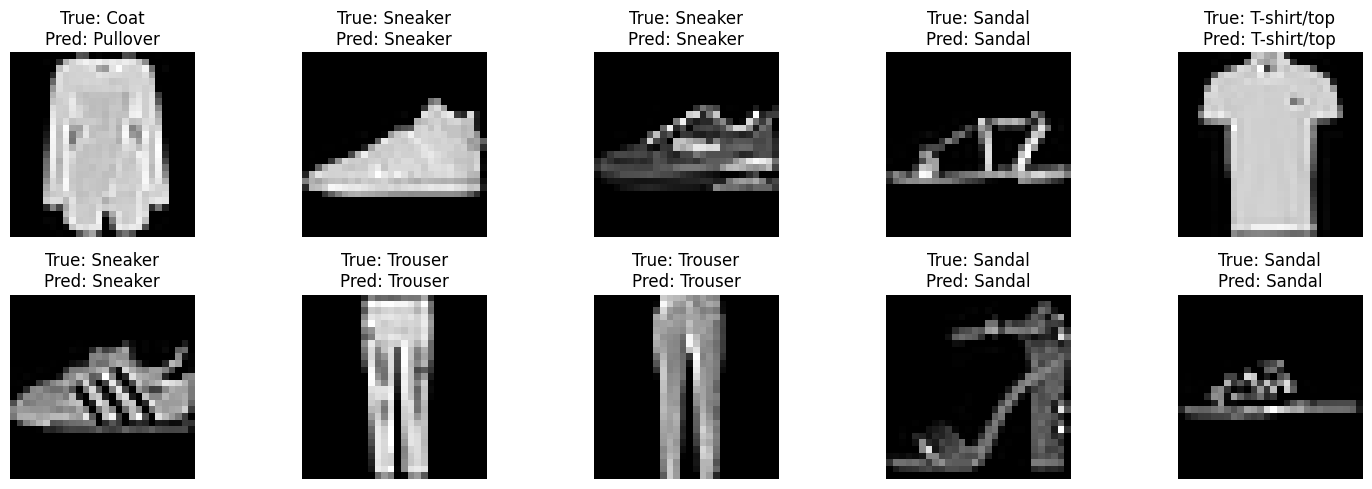

In [11]:
# –ü—Ä–æ–≥–Ω–æ–∑—É–≤–∞–Ω–Ω—è
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# –í–∏–ø–∞–¥–∫–æ–≤—ñ —ñ–Ω–¥–µ–∫—Å–∏
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)

# –í–∏–≤–µ–¥–µ–Ω–Ω—è –∑–æ–±—Ä–∞–∂–µ–Ω—å
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    true_label = class_names[y_true_classes[idx]]
    pred_label = class_names[y_pred_classes[idx]]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
plt.tight_layout()
plt.show()

–í–∏—Å–Ω–æ–≤–æ–∫
–£ —Ü—ñ–π –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω—ñ–π —Ä–æ–±–æ—Ç—ñ —è —Ä–µ–∞–ª—ñ–∑—É–≤–∞–≤ –∑–≥–æ—Ä—Ç–∫–æ–≤—É –Ω–µ–π—Ä–æ–Ω–Ω—É –º–µ—Ä–µ–∂—É –¥–ª—è –∑–∞–¥–∞—á—ñ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó –∑–æ–±—Ä–∞–∂–µ–Ω—å. –ê—Ä—Ö—ñ—Ç–µ–∫—Ç—É—Ä–∞ –º–æ–¥–µ–ª—ñ –≤–∫–ª—é—á–∞—î 3 –∑–≥–æ—Ä—Ç–∫–æ–≤–∏—Ö —à–∞—Ä–∏ —Ç–∞ 2 –ø–æ–≤–Ω–∏—Ö —à–∞—Ä–∏. –î–ª—è –ø—ñ–¥–≤–∏—â–µ–Ω–Ω—è –µ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ –Ω–∞–≤—á–∞–Ω–Ω—è –±—É–ª–∏ –∑–∞—Å—Ç–æ—Å–æ–≤–∞–Ω—ñ –∫–æ–ª–±–µ–∫–∏ –∑–æ–∫—Ä–µ–º–∞, —Ä–∞–Ω–Ω–Ω—è –∑—É–ø–∏–Ω–∫–∞ —Ç–∞ –∑–º–µ–Ω—à–µ–Ω–Ω—è —à–≤–∏–¥–∫–æ—Å—Ç—ñ –Ω–∞–≤—á–∞–Ω–Ω—è. –ù–∞–≤—á–∞–Ω–Ω—è —Ç—Ä–∏–≤–∞–ª–æ 49 –µ–ø–æ—Ö, –∑–∞ —è–∫—ñ –º–æ–¥–µ–ª—å –¥–æ—Å—è–≥–ª–∞ —Ç–æ—á–Ω–æ—Å—Ç—ñ 0.93 —Ç–∞ –≤—Ç—Ä–∞—Ç 0.2. –ê–Ω–∞–ª—ñ–∑ –∫—Ä–∏–≤–∏—Ö –Ω–∞–≤—á–∞–Ω–Ω—è –ø–æ–∫–∞–∑–∞–≤ —Å—Ç–∞–±—ñ–ª—å–Ω–µ –∑—Ä–æ—Å—Ç–∞–Ω–Ω—è —Ç–æ—á–Ω–æ—Å—Ç—ñ —Ç–∞ –∑–º–µ–Ω—à–µ–Ω–Ω—è –≤—Ç—Ä–∞—Ç, —â–æ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –≤—ñ–¥—Å—É—Ç–Ω—ñ—Å—Ç—å –ø–µ—Ä–µ–Ω–∞–≤—á–∞–Ω–Ω—è. –ë—É–ª–æ —Ç–∞–∫–æ–∂ –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–æ–≤–∞–Ω–æ 10 –≤–∏–ø–∞–¥–∫–æ–≤–∏—Ö –∑–æ–±—Ä–∞–∂–µ–Ω—å —ñ–∑ —Ä–µ–∞–ª—å–Ω–∏–º–∏ —Ç–∞ –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω–∏–º–∏ –∫–ª–∞—Å–∞–º–∏ ‚Äî —É –±—ñ–ª—å—à–æ—Å—Ç—ñ –≤–∏–ø–∞–¥–∫—ñ–≤ (9 –∞–±–æ –Ω–∞–≤—ñ—Ç—å 10 —ñ–∑ 10) –∫–ª–∞—Å–∏ –∑–±—ñ–≥–ª–∏—Å—è.


–∂–∏—Ä–∞—Ñ ü¶í.